**Transforming Matrices: Echelon Form in Action**

Definition:

A matrix is in row echelon form if:

- Each row starts with a leading nonzero entry (pivot) that is to the right of the pivot in the row above.
- All entries below each pivot are zero.
- Any zero rows are at the bottom.
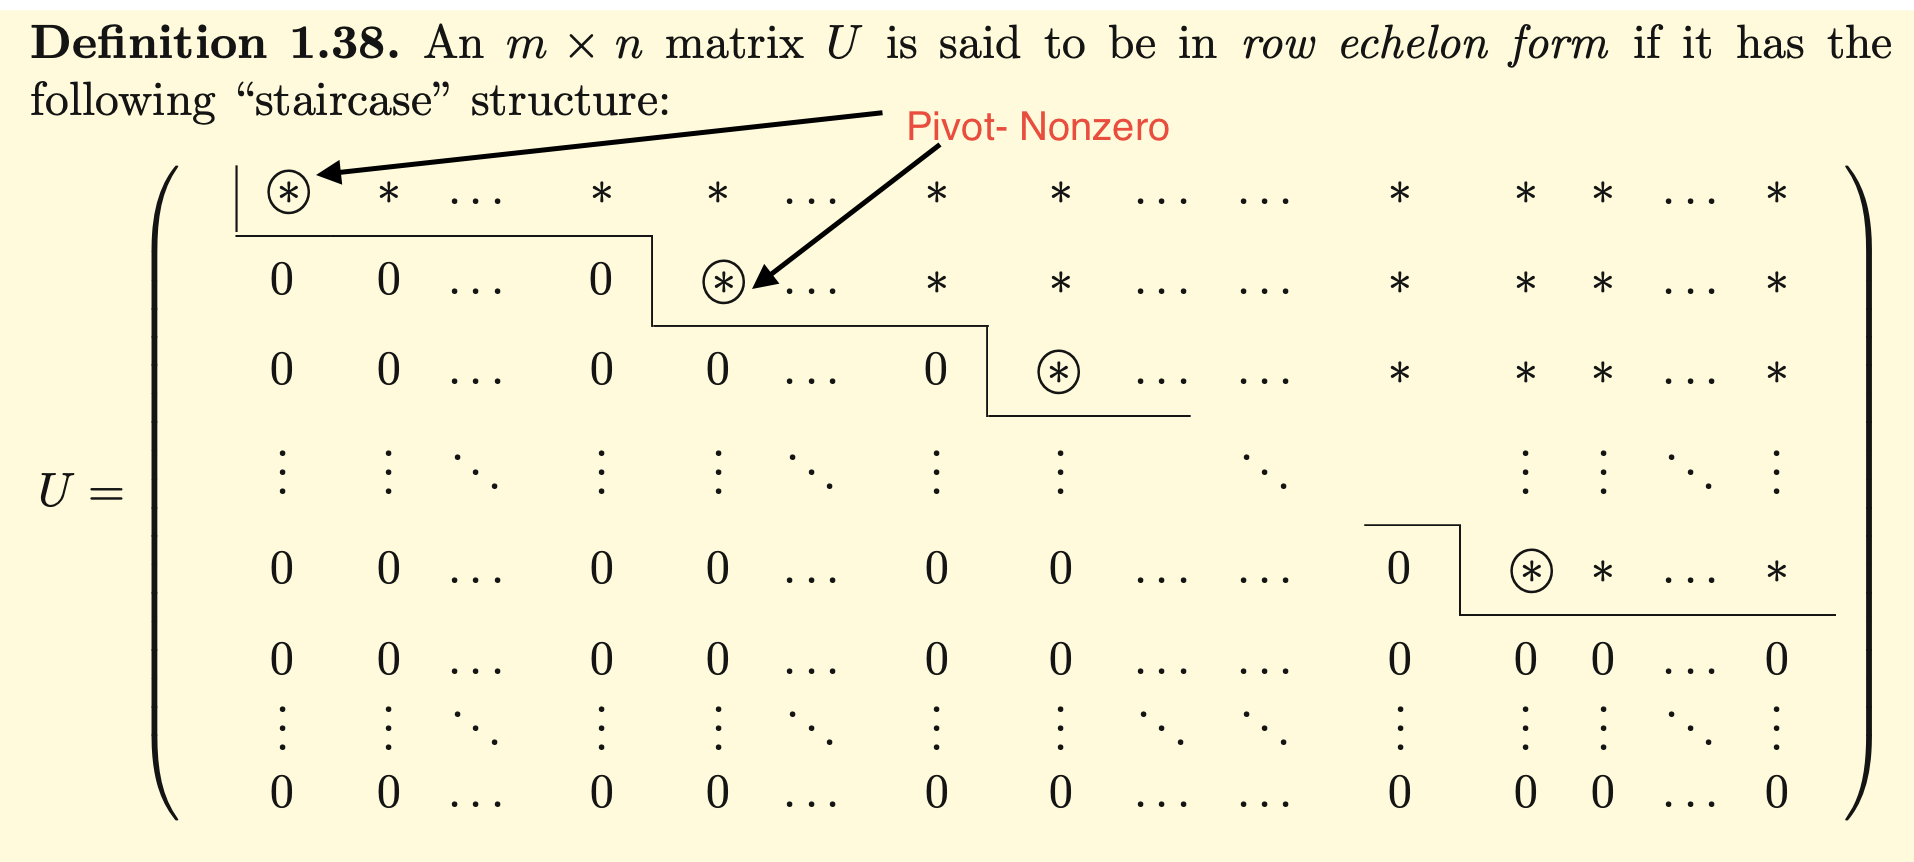


**Finding Echelon Form**

- Step 1: Make the first pivot entry (top-left) equal to 1 by dividing the first row by 2.

- Step 2: Use row operations to make the first column below the pivot zero.

- Step 3: Move to the second pivot and repeat the process.

- Step 4: Continue until the matrix is in echelon form.

**Rank of a Matrix**

Definition:

The rank of a matrix is the number of pivots in its row
echelon form.

- Rank determines the number of independent equations.
- A square matrix is **nonsingular** if and only if its rank equals its size.

In [2]:
# Row Echelon Form + Rank (Matrix input from user)

def row_echelon_form_and_rank(A):
    # Make a copy so we don't mutate the original
    A = [row[:] for row in A]
    rows = len(A)
    cols = len(A[0])
    pivot_row = 0  # index of current row

    for col in range(cols):
        # Find pivot in or below the current row
        pivot = None
        for r in range(pivot_row, rows):
            if A[r][col] != 0:
                pivot = r
                break
        if pivot is None:
            continue  # no pivot in this column

        # Swap current row with pivot row if needed
        if pivot != pivot_row:
            A[pivot_row], A[pivot] = A[pivot], A[pivot_row]

        # Normalize pivot row to make pivot = 1
        pivot_val = A[pivot_row][col]
        A[pivot_row] = [x / pivot_val for x in A[pivot_row]]

        # Eliminate all rows below pivot
        for r in range(pivot_row + 1, rows):
            factor = A[r][col]
            if factor != 0:
                A[r] = [a - factor * b for a, b in zip(A[r], A[pivot_row])]

        pivot_row += 1
        if pivot_row == rows:
            break

    # Compute rank = number of nonzero rows
    rank = sum(1 for row in A if any(abs(x) > 1e-12 for x in row))

    return A, rank


# ---- Get matrix from user ----
rows = int(input("Enter number of rows: "))
cols = int(input("Enter number of columns: "))

A = []
print("Enter the matrix row by row (separate numbers by space):")
for i in range(rows):
    row = list(map(float, input(f"Row {i+1}: ").split()))
    if len(row) != cols:
        raise ValueError("Number of entries in row does not match columns")
    A.append(row)

# Compute row echelon form and rank
ref, rank = row_echelon_form_and_rank(A)

print("\nRow Echelon Form:")
for row in ref:
    print(row)

print("\nRank of the matrix:", rank)


Enter number of rows: 3
Enter number of columns: 3
Enter the matrix row by row (separate numbers by space):
Row 1: 2 4 -2
Row 2: -4 -7 4
Row 3: 6 8 -6

Row Echelon Form:
[1.0, 2.0, -1.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 0.0]

Rank of the matrix: 2
